In [11]:
from __future__ import division
from __future__ import print_function
import scipy
from scipy.special import jv
from scipy.fftpack import *
import numpy as np
import matplotlib.pyplot as plt
import ehtim as eh
from ehtim.calibrating import self_cal as sc
import ehtim.observing.pulses as pl
from ehtim.const_def import *
import matplotlib.pyplot as plt
import numpy as np
import ehtim as eh
from   ehtim.calibrating import self_cal as sc
import time
#from  ehtim.plotting import self_cal as sc
plt.close('all')

ttype = 'direct'

In [12]:
# Load the image and the array
#im = eh.image.load_txt('/home/alex/Videos/eht-imaging-dev/models/roman_eofn.txt')
eht = eh.array.load_txt('/home/alex/Videos/eht-imaging-dev/arrays/EHT2017.txt')

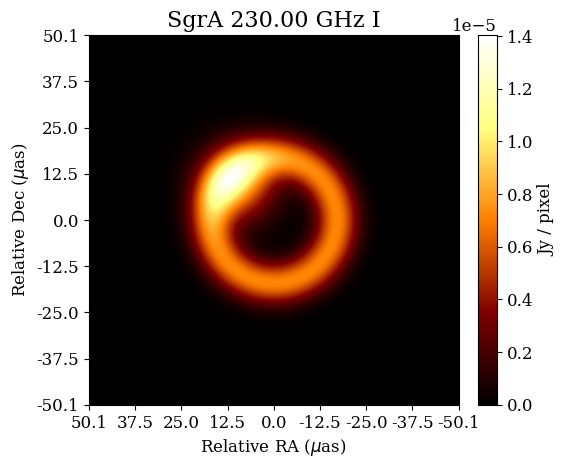

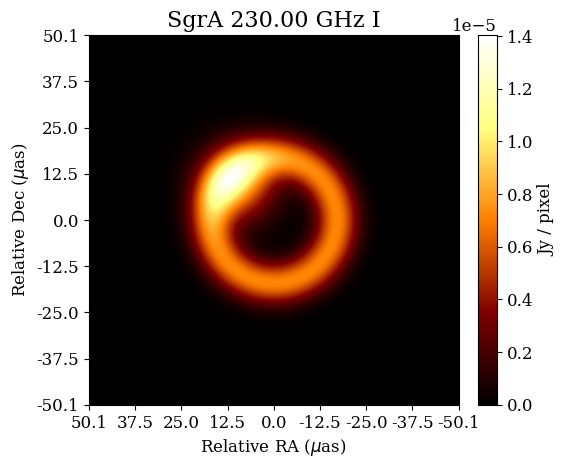

In [13]:
x = np.linspace(-50,50,1000)
muas2rad = 1e-6/3600*np.pi/180
x *= muas2rad
X,Y = np.meshgrid(x,x)
R = np.sqrt(X**2+Y**2)
psize = np.diff(x)[0]
umax = 1./psize/2.
umin = 1./(np.amax(x)-np.amin(x))
#def Gaussian2d(x,y,sigma,x_offset,y_offset):
#       return np.exp(-((x + x_offset)**2 + (y + y_offset)**2) / (sigma / 0.5)**2)
def Gaussian(x,sigma):
    return np.exp(-x**2/(2*sigma**2))

def Gaussian2d(x,y,sigma,x_offset,y_offset):
       return np.exp(-((x + x_offset)**2 + (y + y_offset)**2) / (sigma / 0.5)**2)


image = np.zeros(np.shape(X)) # start with empty image
image += Gaussian(R-17*muas2rad,4*muas2rad) # add circle
image += Gaussian2d(X,Y,5.*muas2rad,10.*muas2rad,10.*muas2rad) # add 2D Gaussian

image /= np.sum(image)

im = eh.image.Image(image[:,:],psize,RA_DEFAULT,DEC_DEFAULT,RF_DEFAULT, mjd=MJD_DEFAULT,pulse=pl.deltaPulse2D)
im.display()


In [14]:
tint_sec = 5
tadv_sec = 600
tstart_hr = 0
tstop_hr = 24
bw_hz = 4e9
obs = im.observe(eht, tint_sec, tadv_sec, tstart_hr, tstop_hr, bw_hz,
                 sgrscat=False, ampcal=True, phasecal=False)


Generating empty observation file . . . 
Producing clean visibilities from image with nfft FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
   Applying atmospheric phase corruption: phasecal-->False
Adding thermal noise to data . . . 


Clean beam parameters:  [1.19728384e-10 7.88252023e-11 1.38129500e+00]
Nominal Resolution:  1.1454591407637095e-10
Generating I image...
Initial S_1: 0.000000 S_2: 0.000000 S_3: 0.000000
Initial Chi^2_1: 327.814363 Chi^2_2: 1.000000 Chi^2_3: 1.000000
Initial Objective Function: 32681.436280
Total Data 1:  645
Total Pixel #:  16384
Clipped Pixel #:  16384

i: 0 chi2_1: 327.81 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.00 s_2: 0.00 s_3: 0.00


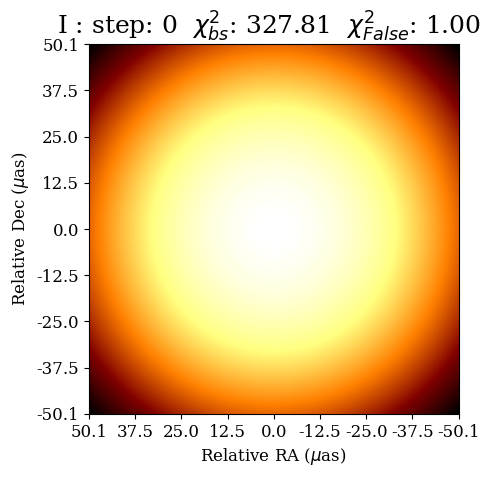

i: 1 chi2_1: 267.27 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.15 s_2: 0.00 s_3: 0.00


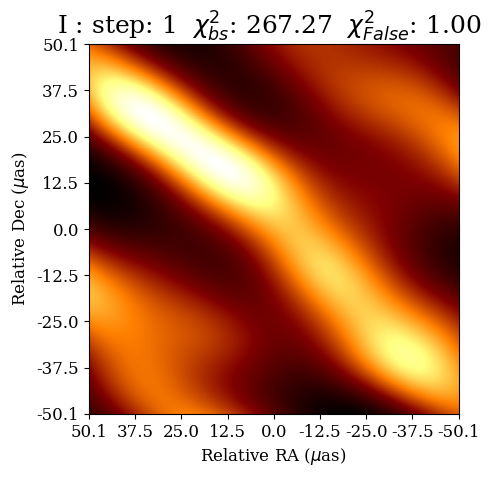

i: 2 chi2_1: 267.21 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.15 s_2: 0.00 s_3: 0.00


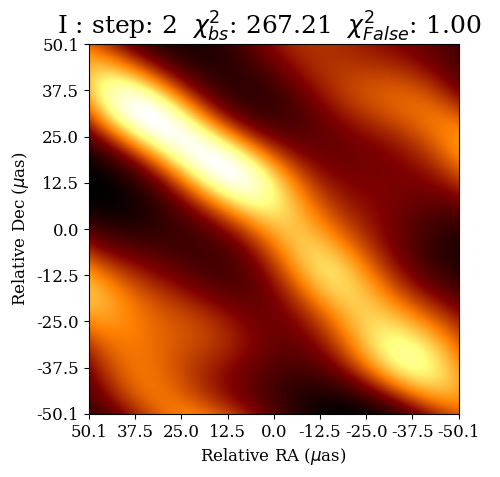

i: 3 chi2_1: 230.77 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.22 s_2: 0.00 s_3: 0.00


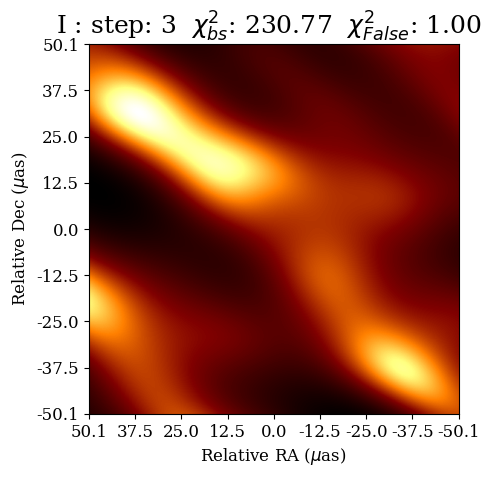

i: 4 chi2_1: 214.63 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.31 s_2: 0.00 s_3: 0.00


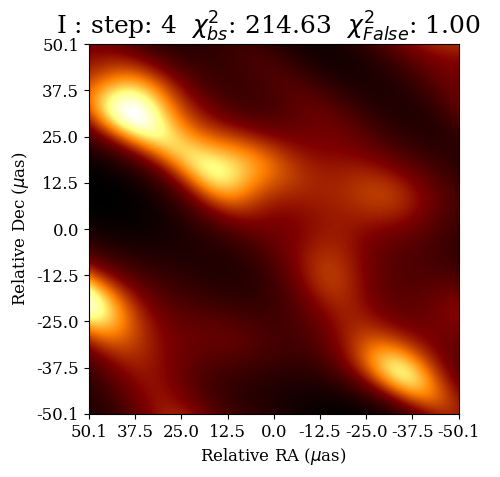

i: 5 chi2_1: 194.95 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.41 s_2: 0.00 s_3: 0.00


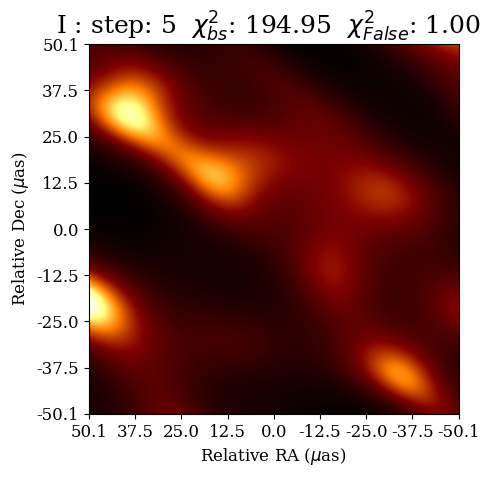

i: 6 chi2_1: 171.71 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.53 s_2: 0.00 s_3: 0.00


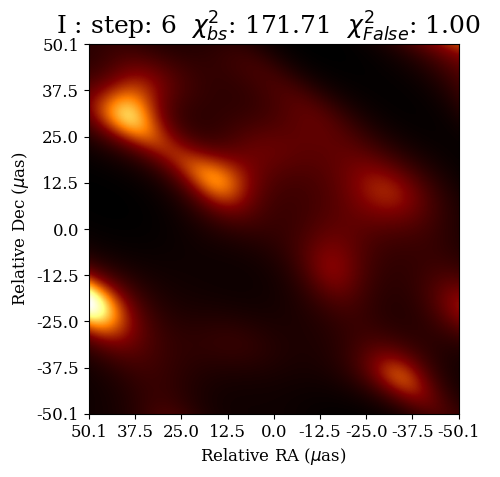

i: 7 chi2_1: 131.27 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.79 s_2: 0.00 s_3: 0.00


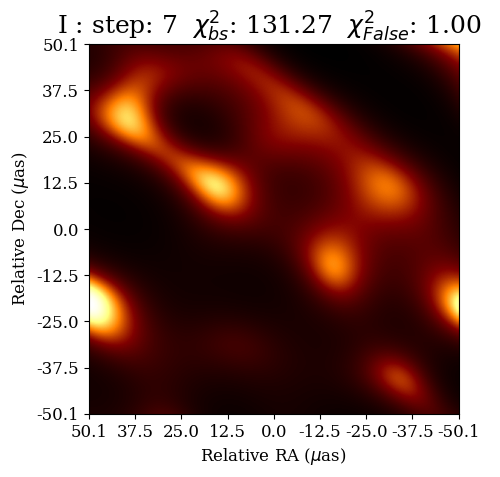

i: 8 chi2_1: 103.69 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.67 s_2: 0.00 s_3: 0.00


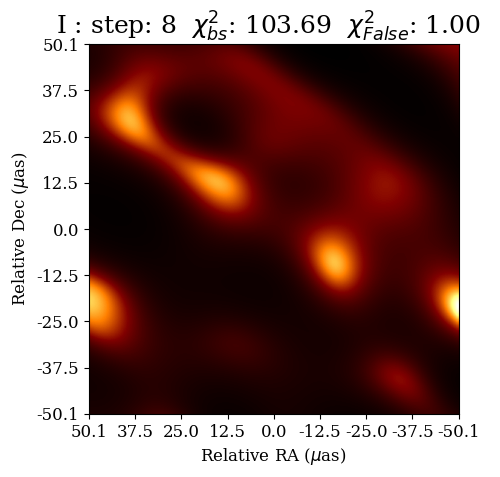

i: 9 chi2_1: 97.20 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.65 s_2: 0.00 s_3: 0.00


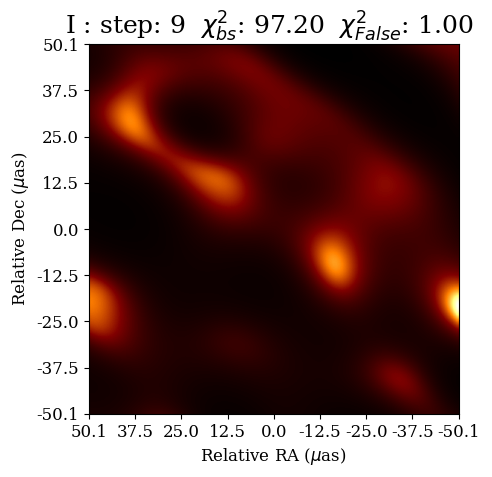

i: 10 chi2_1: 89.74 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.73 s_2: 0.00 s_3: 0.00


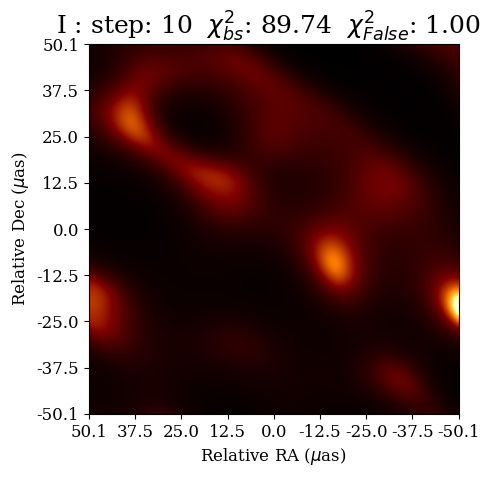

i: 11 chi2_1: 81.55 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.83 s_2: 0.00 s_3: 0.00


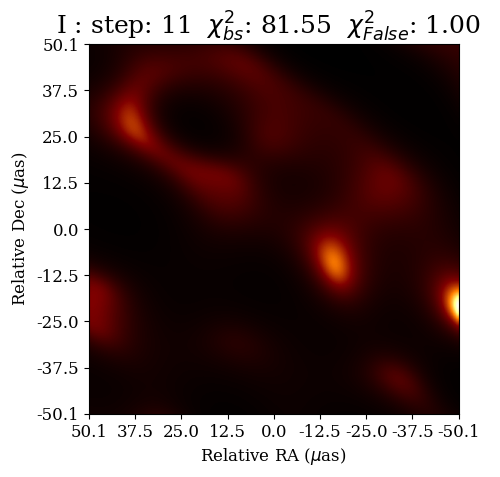

i: 12 chi2_1: 75.09 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.91 s_2: 0.00 s_3: 0.00


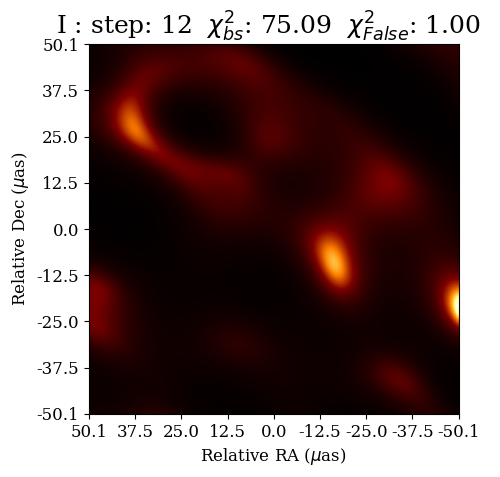

i: 13 chi2_1: 67.67 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.85 s_2: 0.00 s_3: 0.00


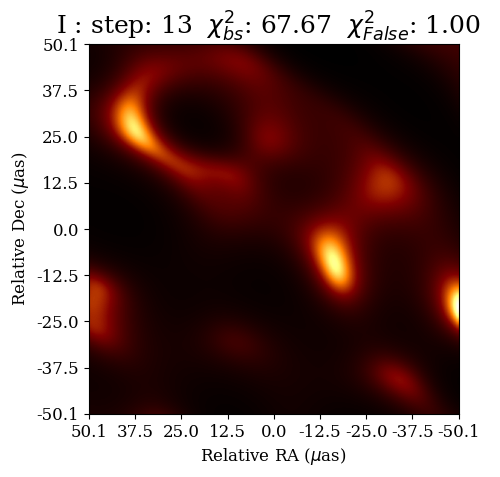

i: 14 chi2_1: 63.85 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.85 s_2: 0.00 s_3: 0.00


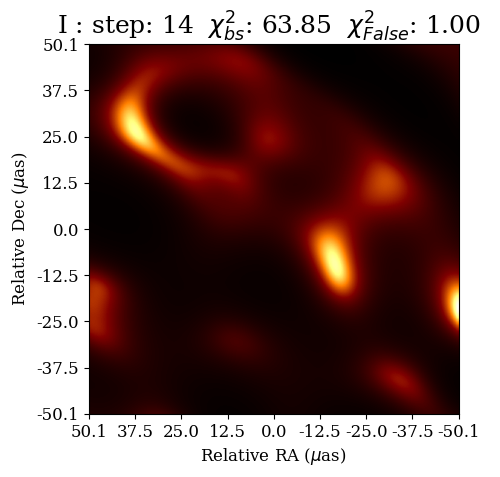

i: 15 chi2_1: 57.71 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.87 s_2: 0.00 s_3: 0.00


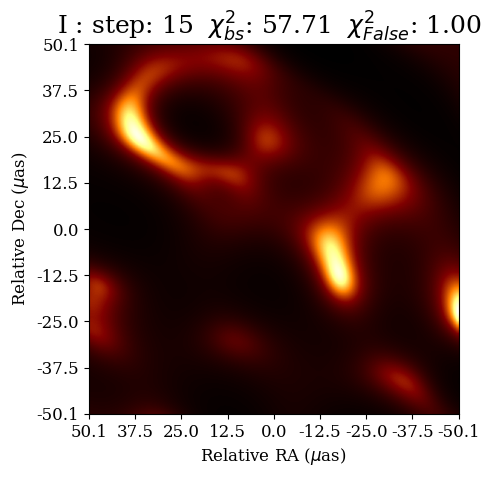

i: 16 chi2_1: 49.99 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.99 s_2: 0.00 s_3: 0.00


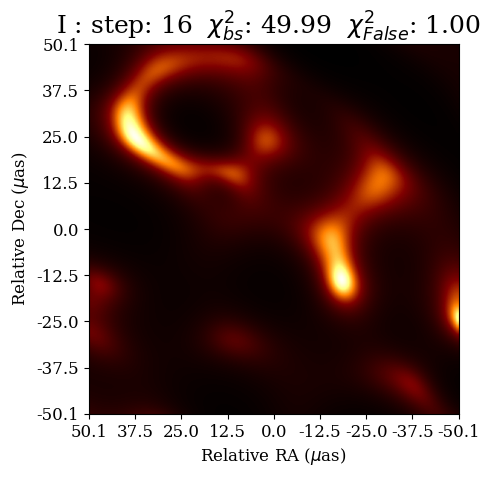

i: 17 chi2_1: 45.53 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.04 s_2: 0.00 s_3: 0.00


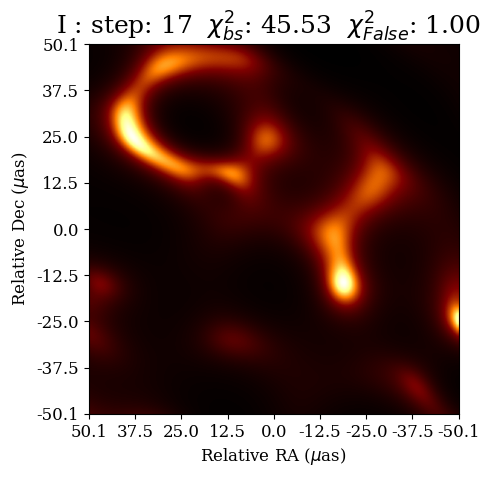

i: 18 chi2_1: 41.11 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.05 s_2: 0.00 s_3: 0.00


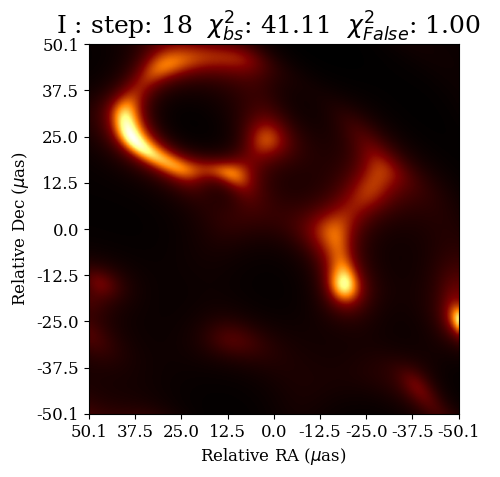

i: 19 chi2_1: 38.17 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.06 s_2: 0.00 s_3: 0.00


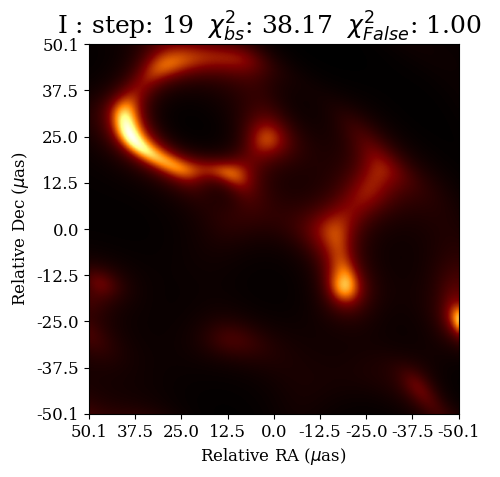

i: 20 chi2_1: 34.01 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.11 s_2: 0.00 s_3: 0.00


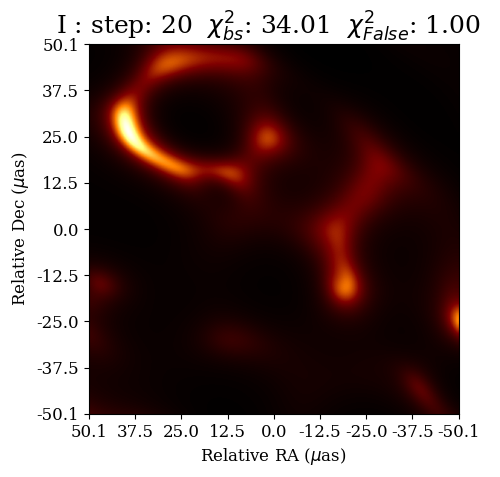

i: 21 chi2_1: 28.18 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.10 s_2: 0.00 s_3: 0.00


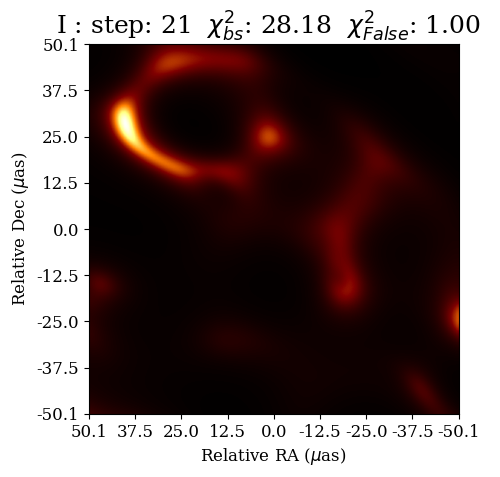

i: 22 chi2_1: 21.91 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.17 s_2: 0.00 s_3: 0.00


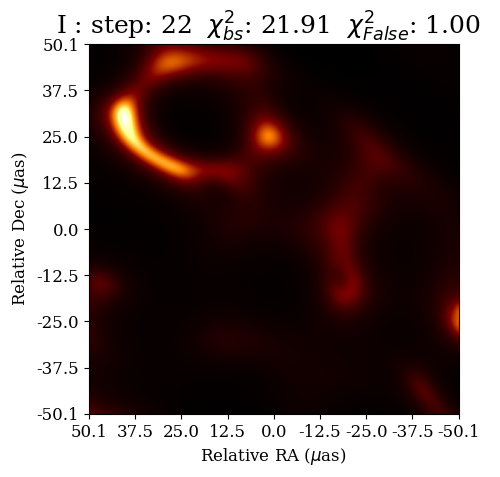

i: 23 chi2_1: 18.09 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.15 s_2: 0.00 s_3: 0.00


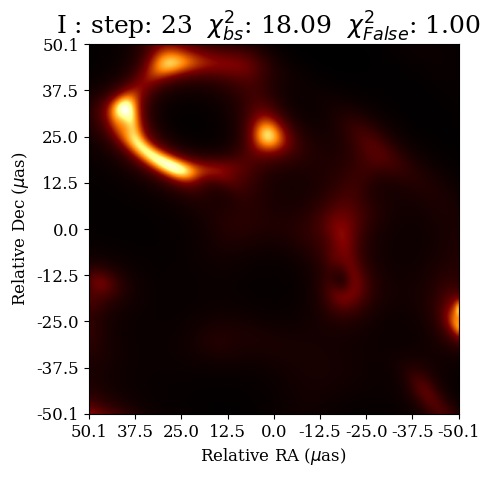

i: 24 chi2_1: 15.49 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.15 s_2: 0.00 s_3: 0.00


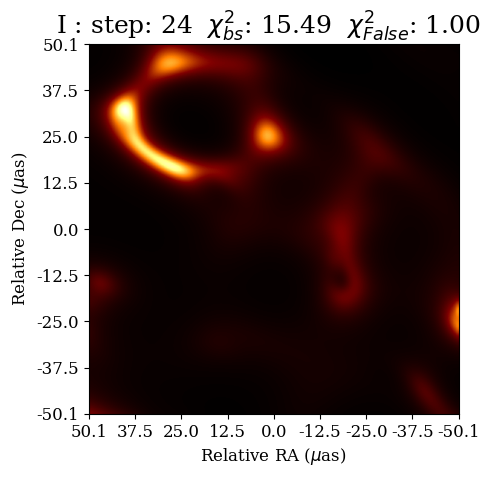

i: 25 chi2_1: 14.61 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.16 s_2: 0.00 s_3: 0.00


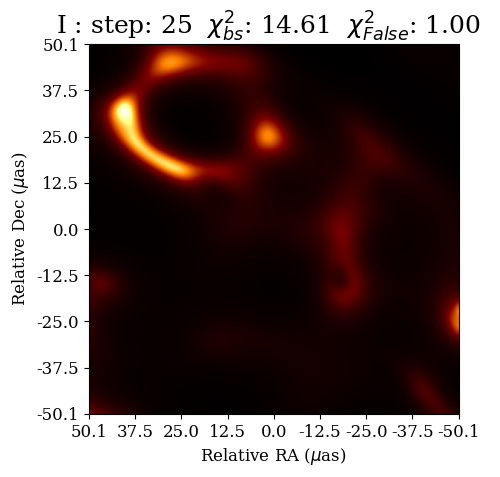

i: 26 chi2_1: 13.92 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.16 s_2: 0.00 s_3: 0.00


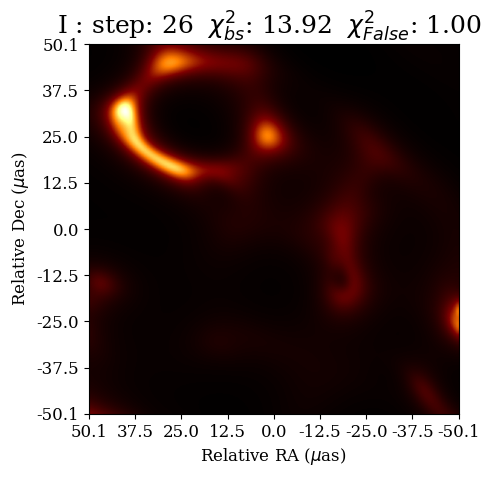

i: 27 chi2_1: 11.94 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.17 s_2: 0.00 s_3: 0.00


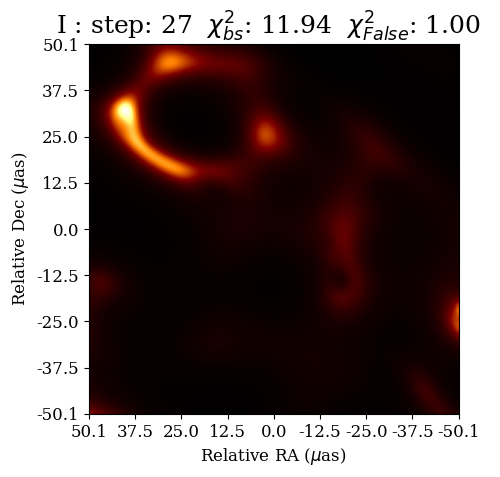

i: 28 chi2_1: 10.56 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.14 s_2: 0.00 s_3: 0.00


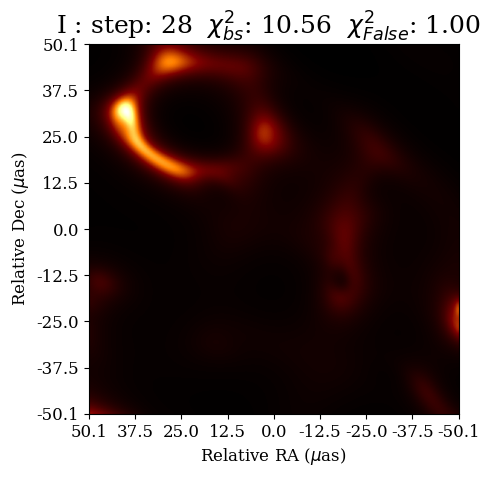

i: 29 chi2_1: 9.54 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.18 s_2: 0.00 s_3: 0.00


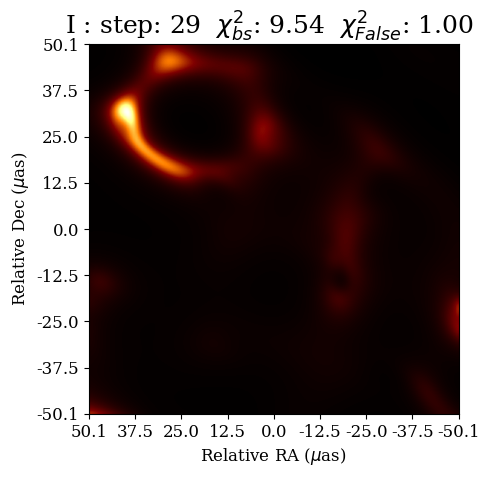

i: 30 chi2_1: 8.65 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.17 s_2: 0.00 s_3: 0.00


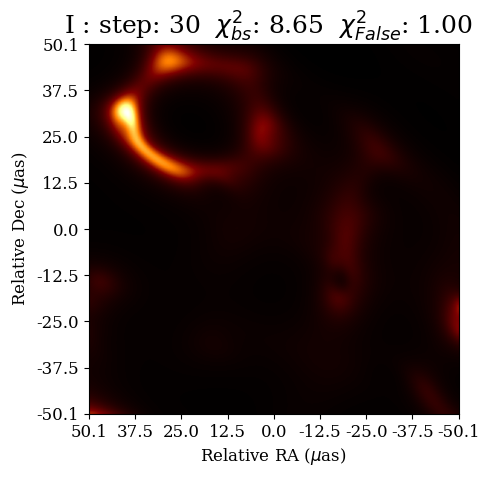

i: 31 chi2_1: 7.75 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.18 s_2: 0.00 s_3: 0.00


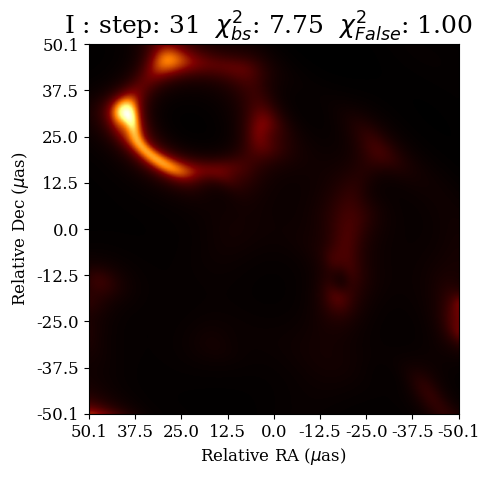

i: 32 chi2_1: 6.78 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.20 s_2: 0.00 s_3: 0.00


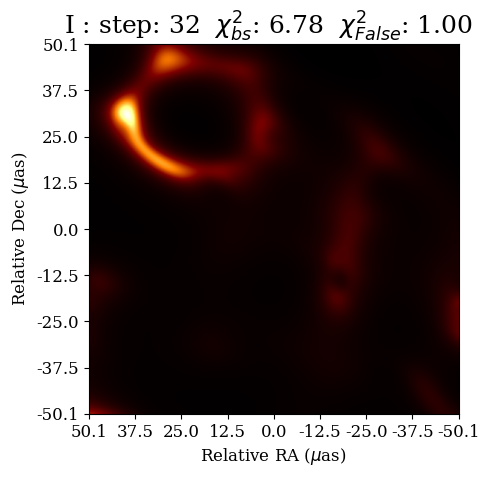

i: 33 chi2_1: 6.27 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.19 s_2: 0.00 s_3: 0.00


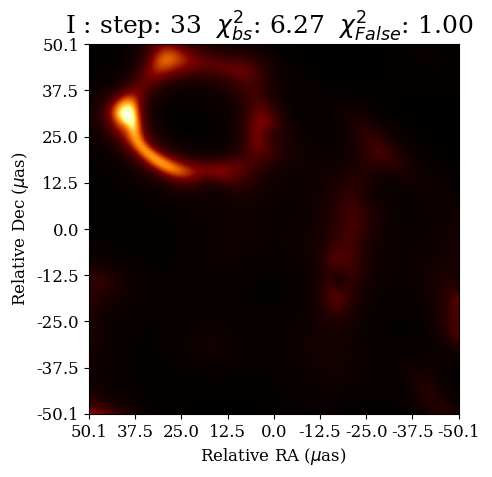

i: 34 chi2_1: 5.69 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.22 s_2: 0.00 s_3: 0.00


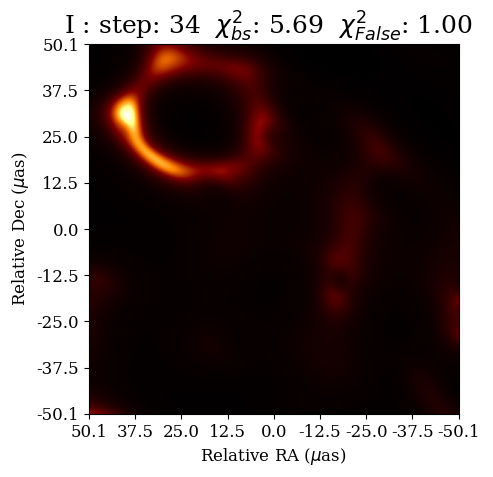

i: 35 chi2_1: 5.41 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.21 s_2: 0.00 s_3: 0.00


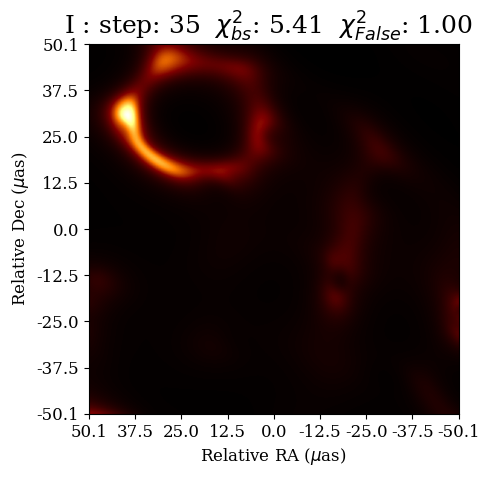

i: 36 chi2_1: 5.10 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.22 s_2: 0.00 s_3: 0.00


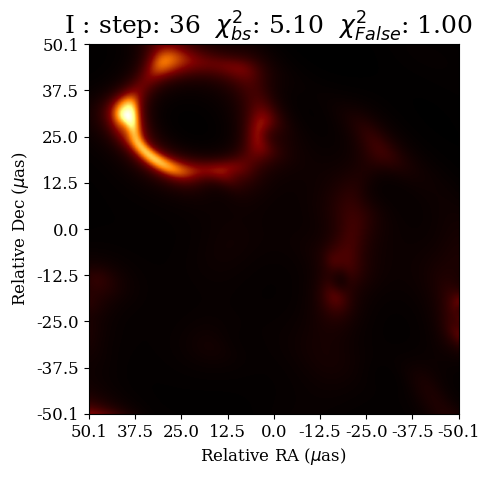

i: 37 chi2_1: 4.92 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.21 s_2: 0.00 s_3: 0.00


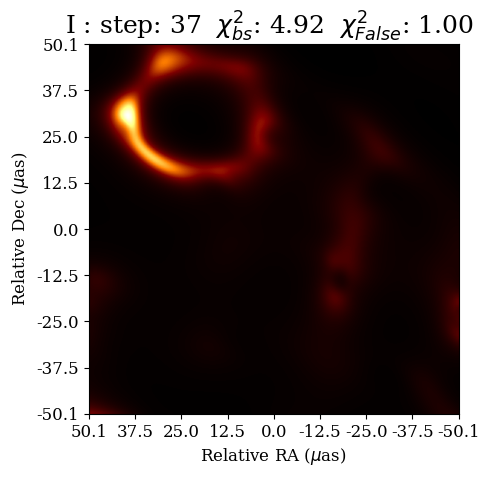

i: 38 chi2_1: 4.56 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.22 s_2: 0.00 s_3: 0.00


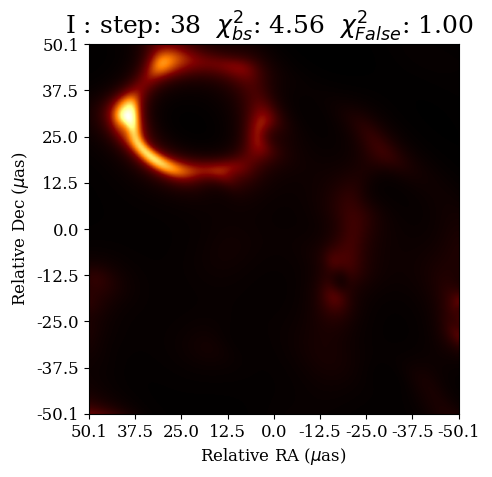

i: 39 chi2_1: 4.12 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.22 s_2: 0.00 s_3: 0.00


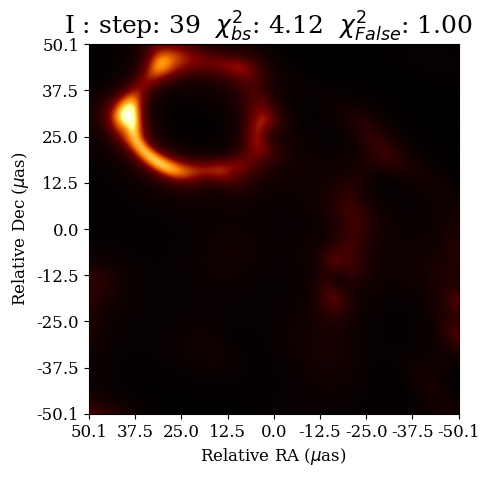

i: 40 chi2_1: 3.90 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.24 s_2: 0.00 s_3: 0.00


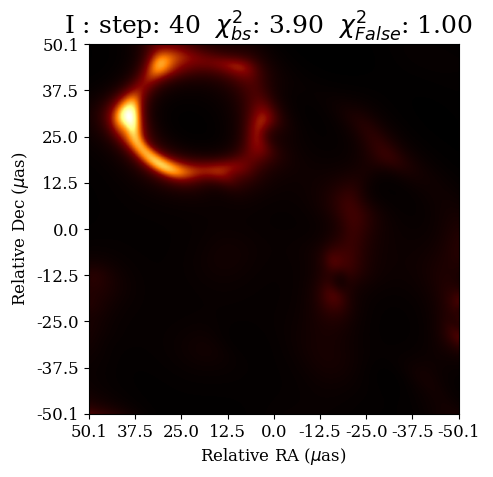

i: 41 chi2_1: 3.81 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.24 s_2: 0.00 s_3: 0.00


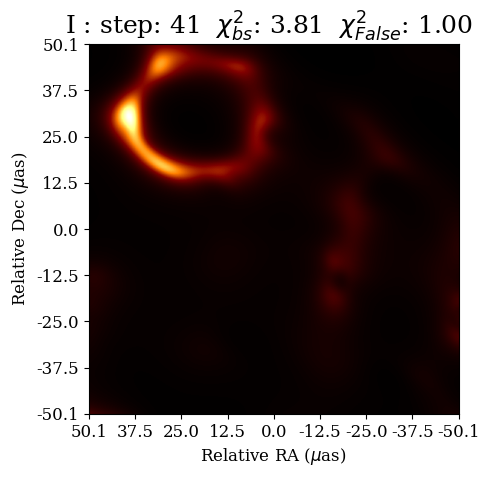

i: 42 chi2_1: 3.77 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.24 s_2: 0.00 s_3: 0.00


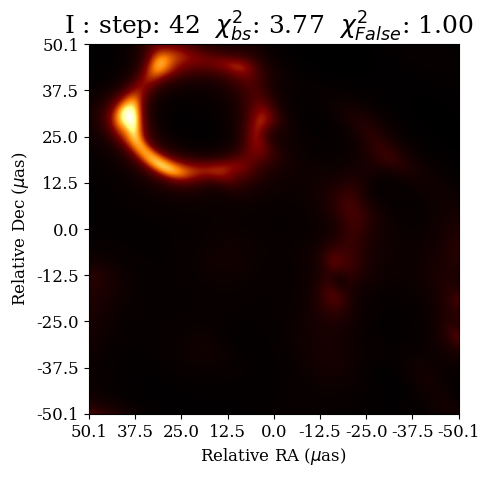

i: 43 chi2_1: 3.71 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.24 s_2: 0.00 s_3: 0.00


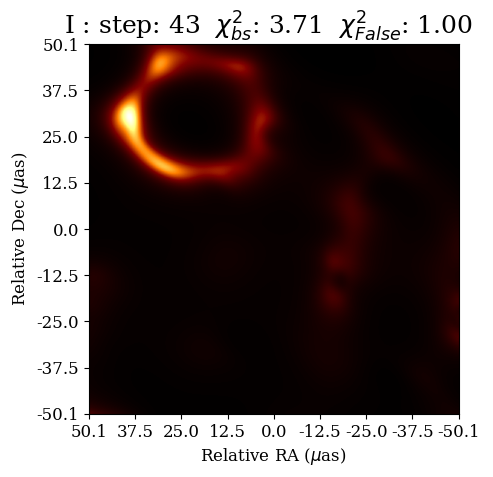

i: 44 chi2_1: 3.58 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.25 s_2: 0.00 s_3: 0.00


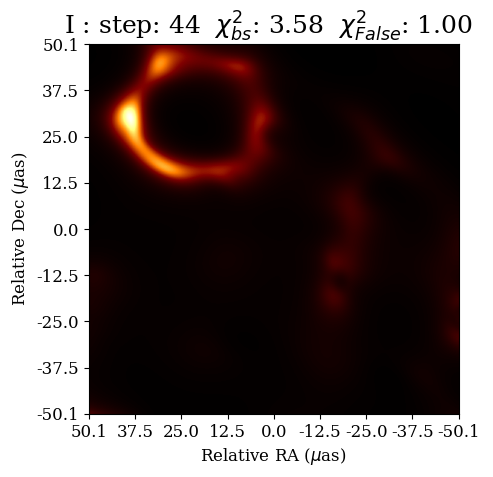

i: 45 chi2_1: 3.47 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.26 s_2: 0.00 s_3: 0.00


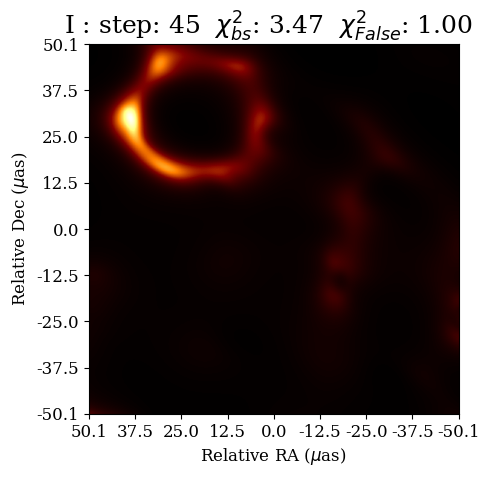

i: 46 chi2_1: 3.40 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.27 s_2: 0.00 s_3: 0.00


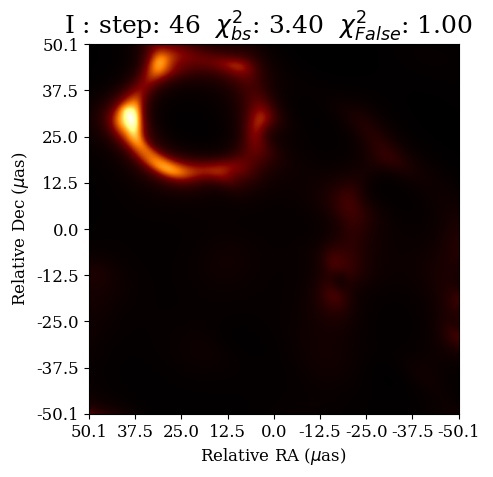

i: 47 chi2_1: 3.33 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.27 s_2: 0.00 s_3: 0.00


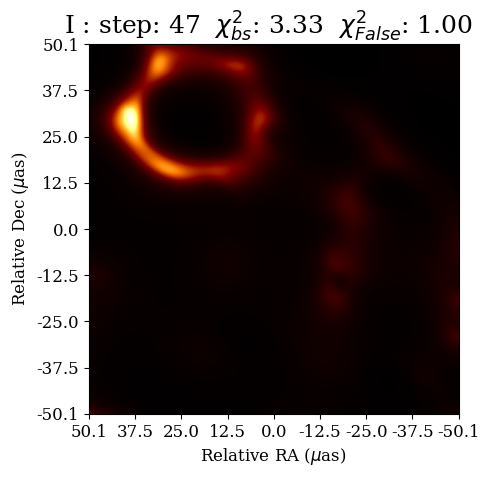

i: 48 chi2_1: 3.28 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.28 s_2: 0.00 s_3: 0.00


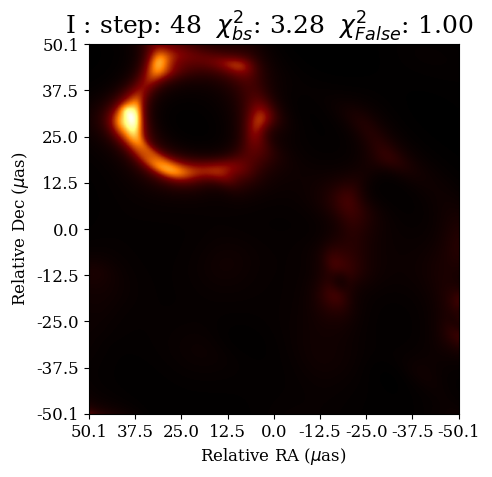

i: 49 chi2_1: 3.21 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.28 s_2: 0.00 s_3: 0.00


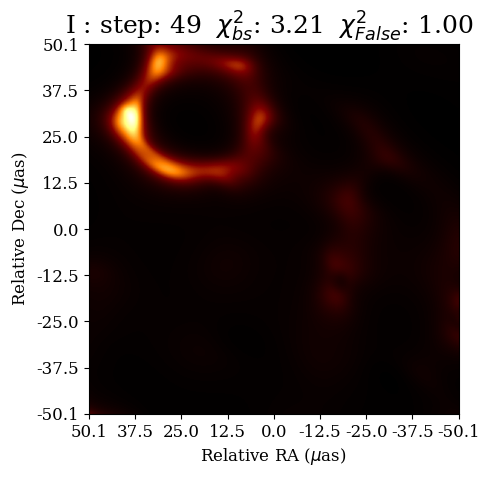

i: 50 chi2_1: 3.16 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.29 s_2: 0.00 s_3: 0.00


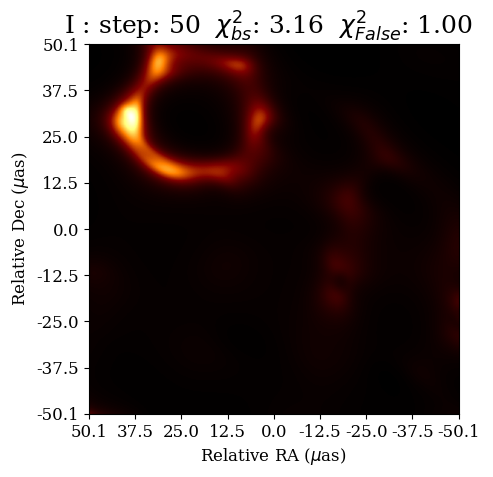

i: 51 chi2_1: 3.13 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.28 s_2: 0.00 s_3: 0.00


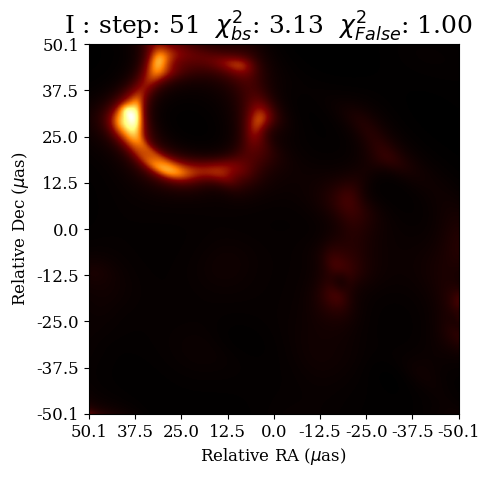

i: 52 chi2_1: 3.11 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.28 s_2: 0.00 s_3: 0.00


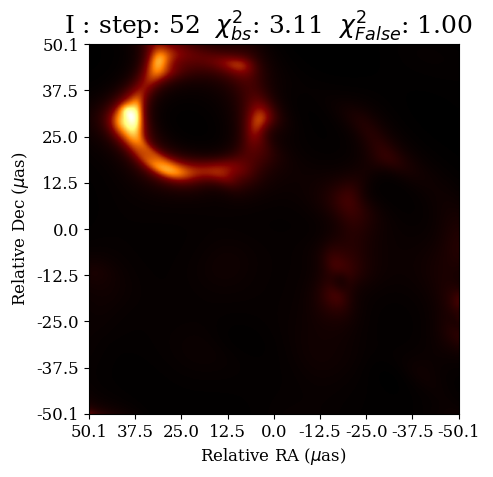

i: 53 chi2_1: 3.07 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.29 s_2: 0.00 s_3: 0.00


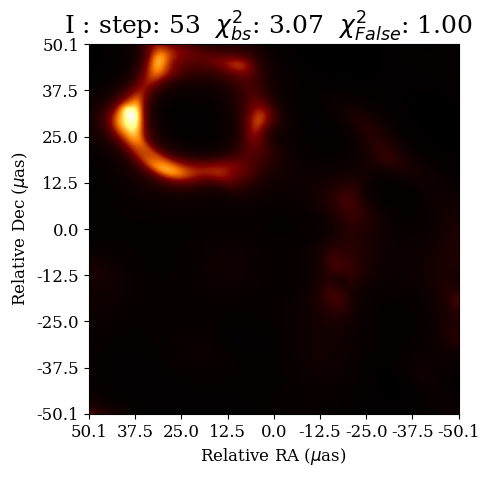

i: 54 chi2_1: 3.02 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.29 s_2: 0.00 s_3: 0.00


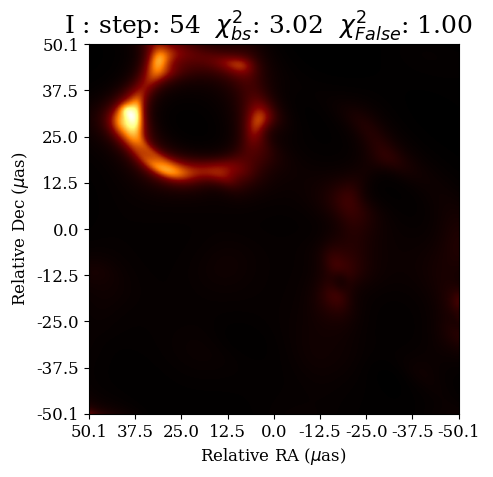

i: 55 chi2_1: 2.92 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.31 s_2: 0.00 s_3: 0.00


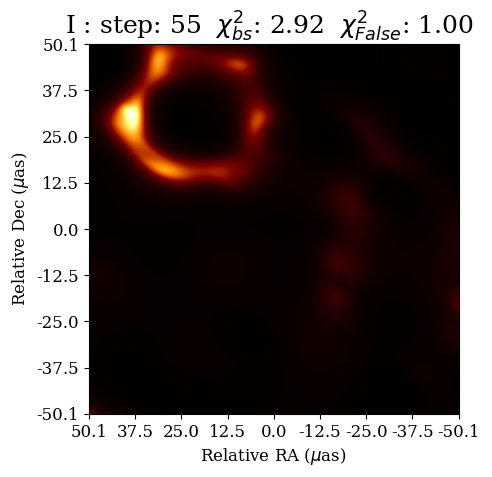

i: 56 chi2_1: 2.79 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.32 s_2: 0.00 s_3: 0.00


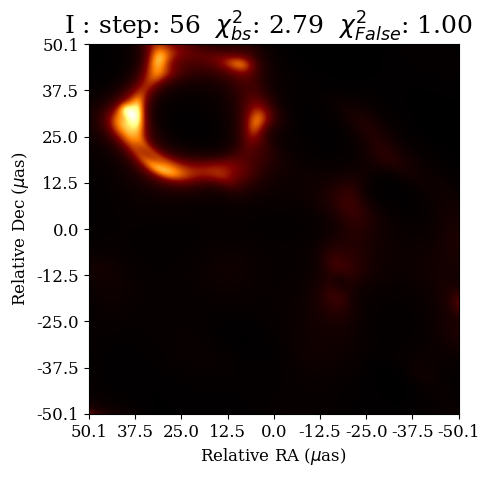

i: 57 chi2_1: 2.59 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.34 s_2: 0.00 s_3: 0.00


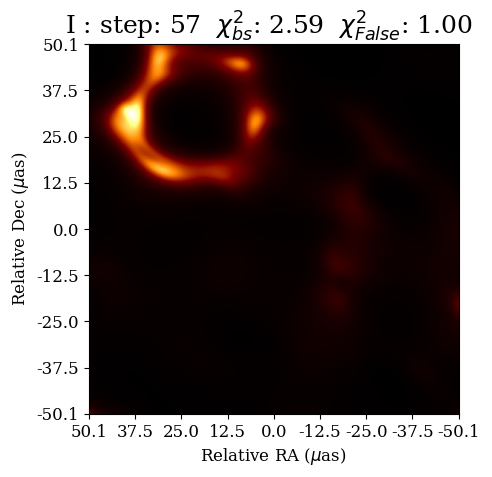

i: 58 chi2_1: 2.43 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.33 s_2: 0.00 s_3: 0.00


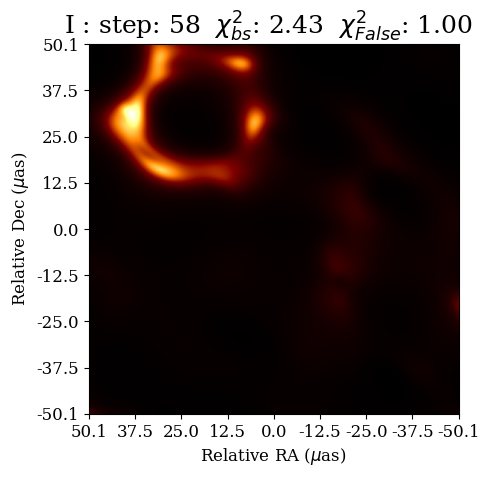

i: 59 chi2_1: 2.36 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.35 s_2: 0.00 s_3: 0.00


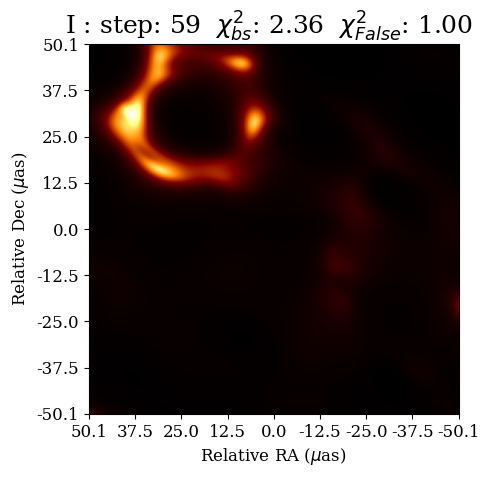

i: 60 chi2_1: 2.32 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.35 s_2: 0.00 s_3: 0.00


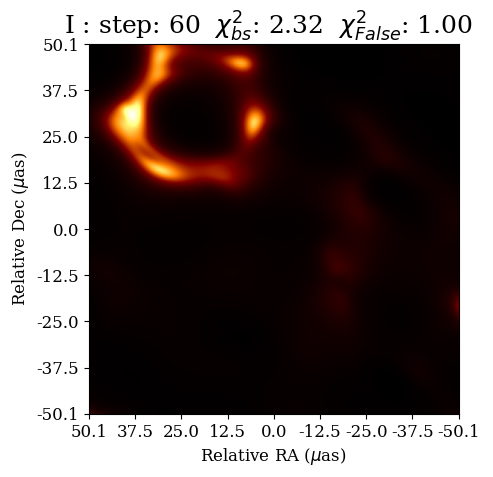

i: 61 chi2_1: 2.29 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.35 s_2: 0.00 s_3: 0.00


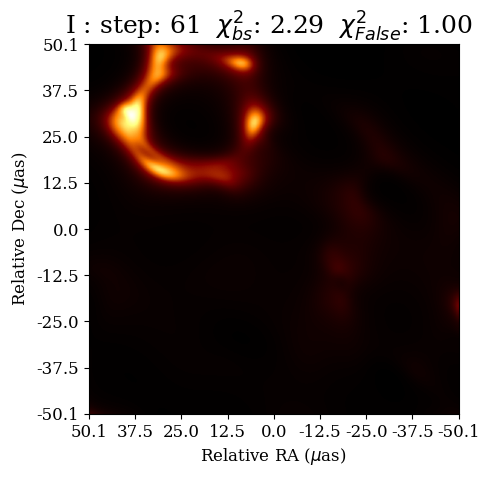

i: 62 chi2_1: 2.27 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.34 s_2: 0.00 s_3: 0.00


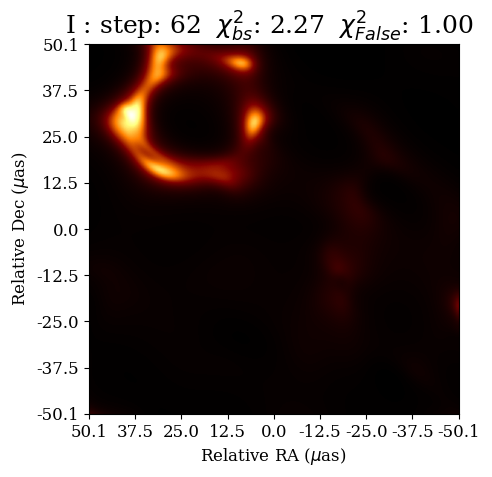

i: 63 chi2_1: 2.22 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.34 s_2: 0.00 s_3: 0.00


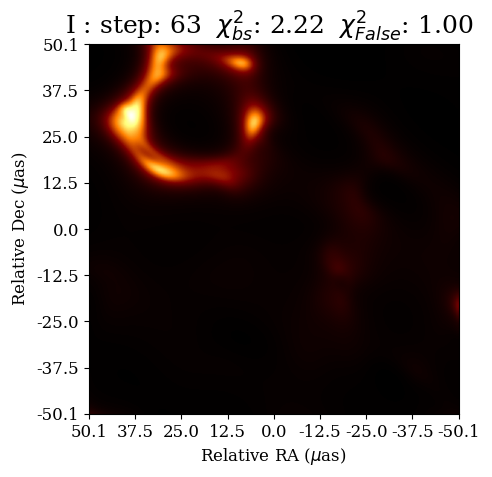

i: 64 chi2_1: 2.14 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.35 s_2: 0.00 s_3: 0.00


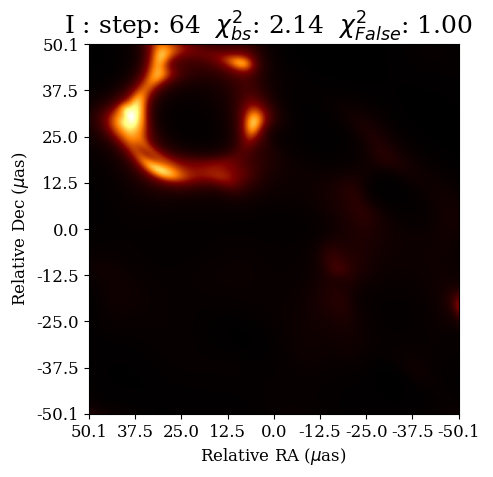

i: 65 chi2_1: 2.10 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.35 s_2: 0.00 s_3: 0.00


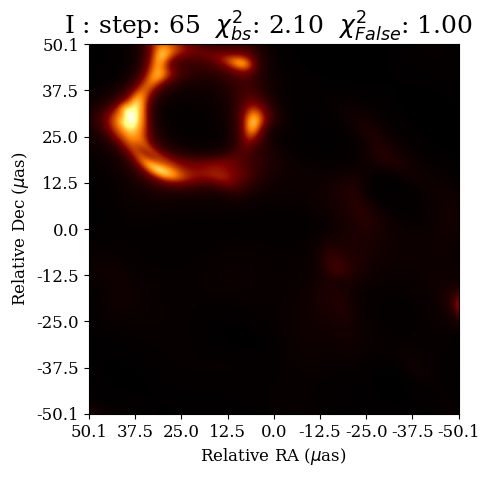

i: 66 chi2_1: 2.07 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.35 s_2: 0.00 s_3: 0.00


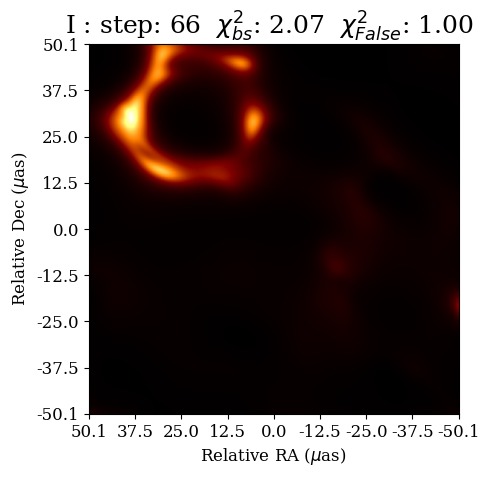

i: 67 chi2_1: 2.00 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.37 s_2: 0.00 s_3: 0.00


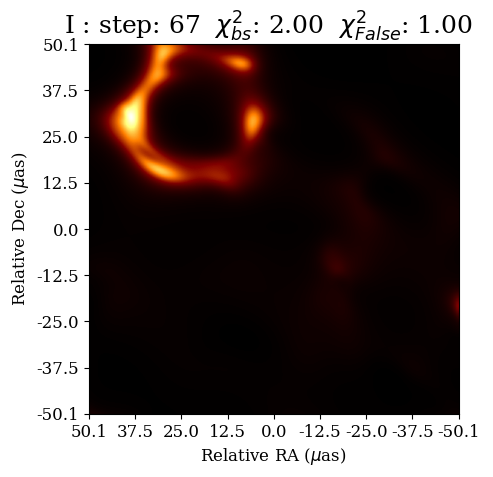

i: 68 chi2_1: 1.96 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.36 s_2: 0.00 s_3: 0.00


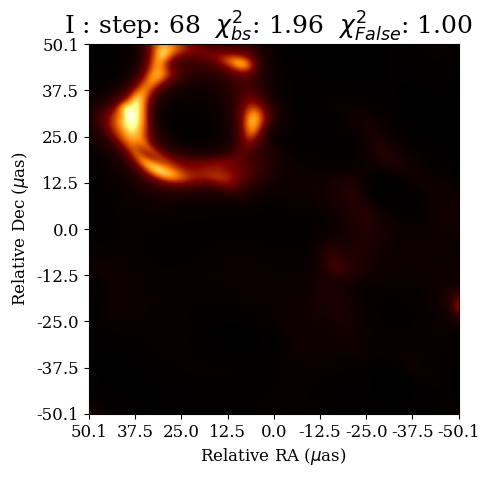

i: 69 chi2_1: 1.92 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.38 s_2: 0.00 s_3: 0.00


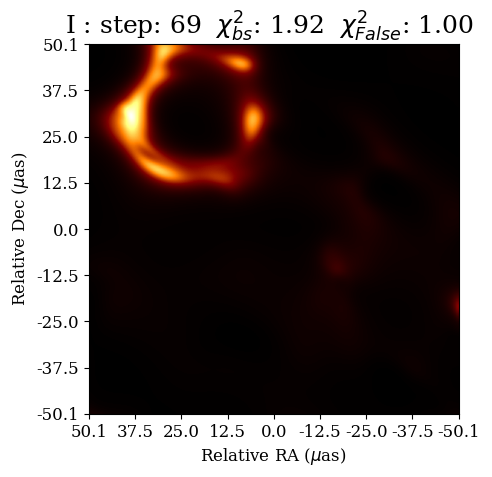

i: 70 chi2_1: 1.88 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.38 s_2: 0.00 s_3: 0.00


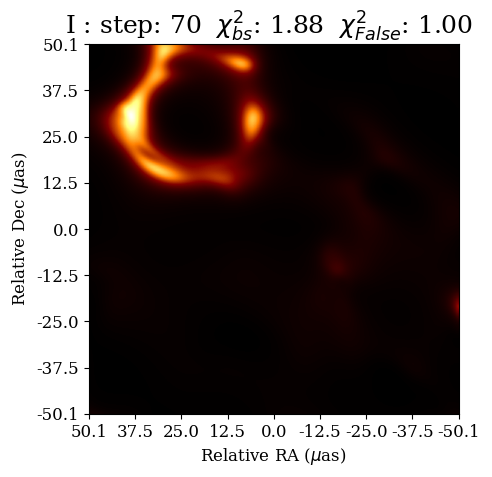

i: 71 chi2_1: 1.86 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.38 s_2: 0.00 s_3: 0.00


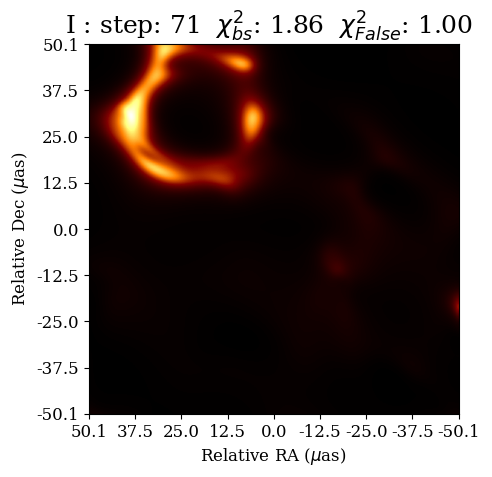

i: 72 chi2_1: 1.84 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.38 s_2: 0.00 s_3: 0.00


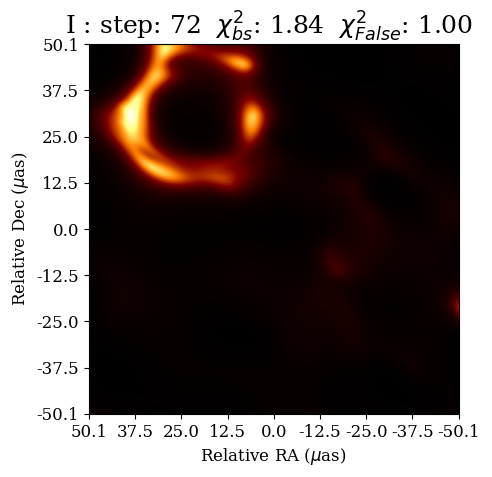

i: 73 chi2_1: 1.82 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.39 s_2: 0.00 s_3: 0.00


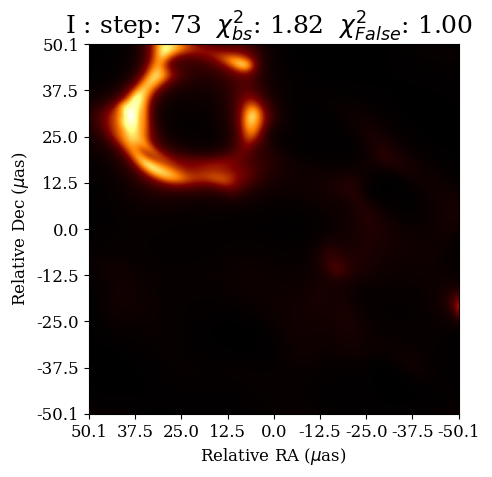

i: 74 chi2_1: 1.77 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.39 s_2: 0.00 s_3: 0.00


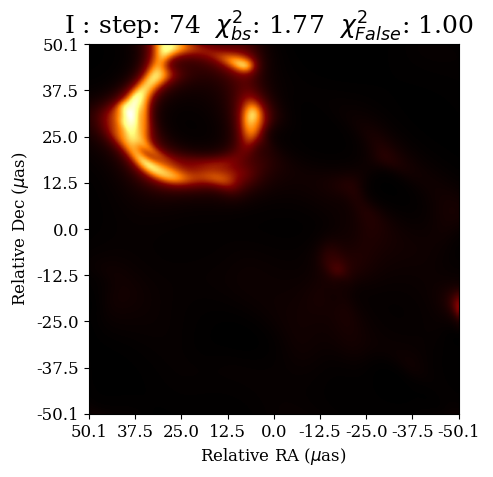

i: 75 chi2_1: 1.74 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.40 s_2: 0.00 s_3: 0.00


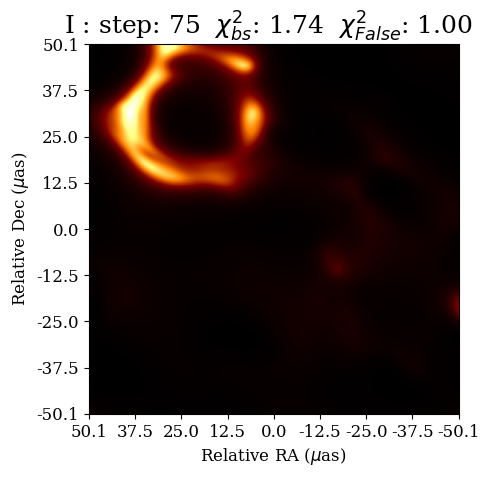

i: 76 chi2_1: 1.70 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.40 s_2: 0.00 s_3: 0.00


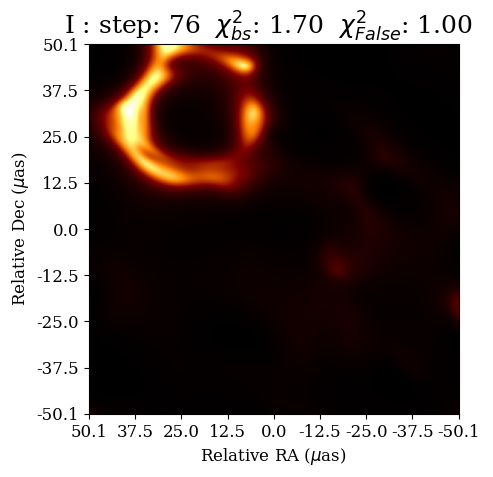

i: 77 chi2_1: 1.66 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.42 s_2: 0.00 s_3: 0.00


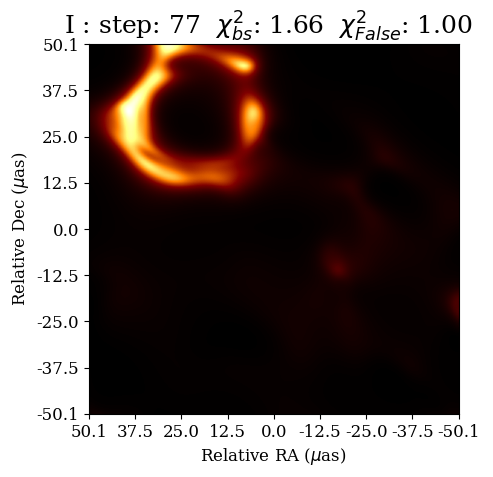

i: 78 chi2_1: 1.64 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.42 s_2: 0.00 s_3: 0.00


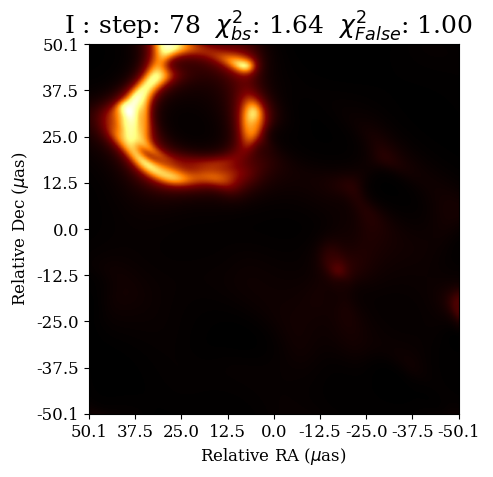

i: 79 chi2_1: 1.63 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.42 s_2: 0.00 s_3: 0.00


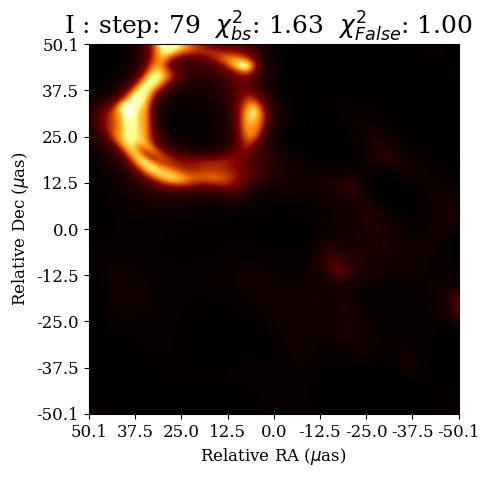

i: 80 chi2_1: 1.62 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.42 s_2: 0.00 s_3: 0.00


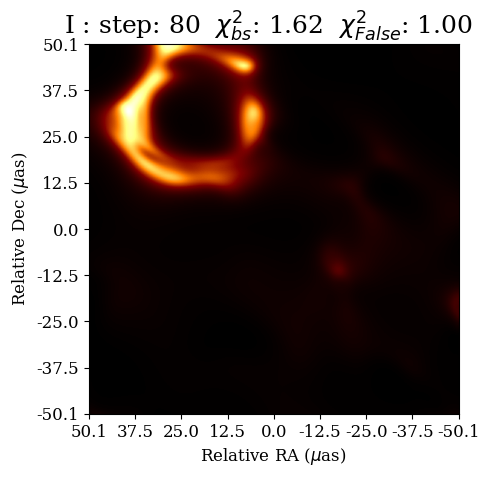

i: 81 chi2_1: 1.61 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.42 s_2: 0.00 s_3: 0.00


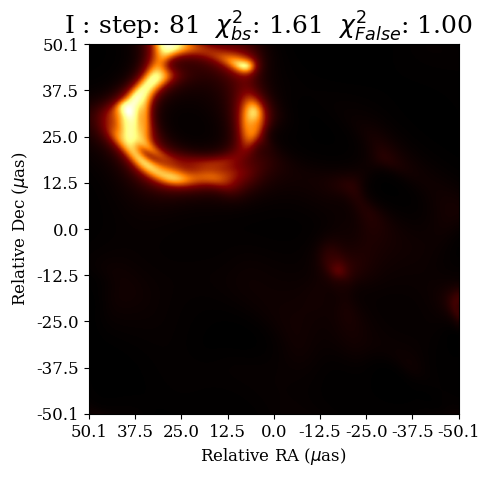

i: 82 chi2_1: 1.57 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.44 s_2: 0.00 s_3: 0.00


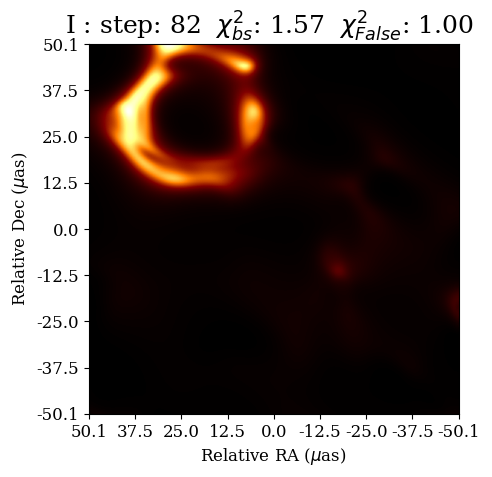

i: 83 chi2_1: 1.54 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.44 s_2: 0.00 s_3: 0.00


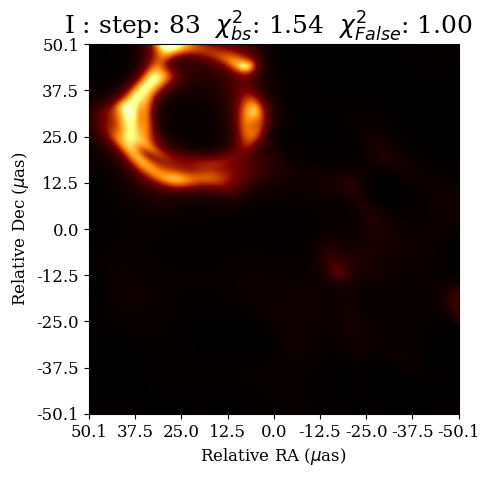

i: 84 chi2_1: 1.51 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.45 s_2: 0.00 s_3: 0.00


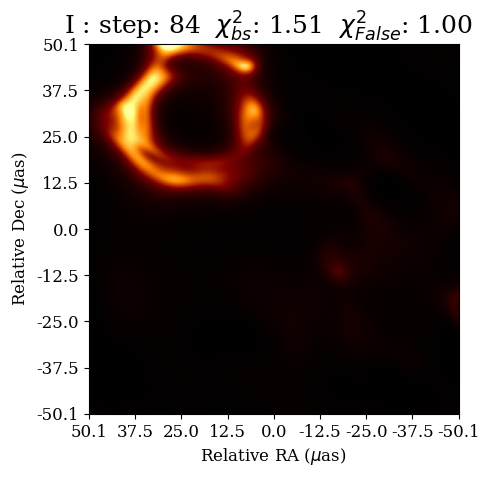

i: 85 chi2_1: 1.48 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.46 s_2: 0.00 s_3: 0.00


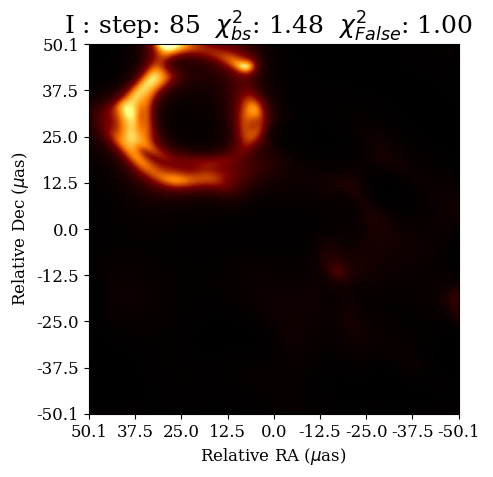

i: 86 chi2_1: 1.48 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.47 s_2: 0.00 s_3: 0.00


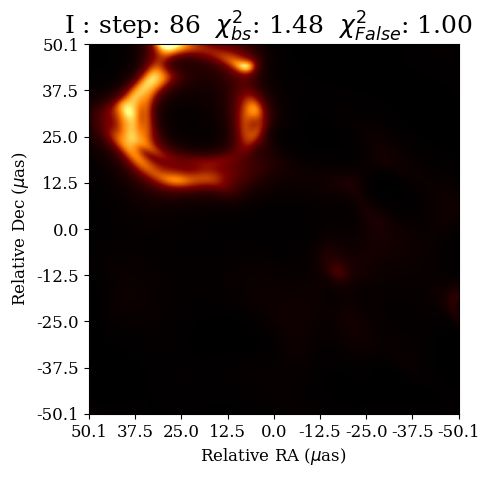

i: 87 chi2_1: 1.46 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.48 s_2: 0.00 s_3: 0.00


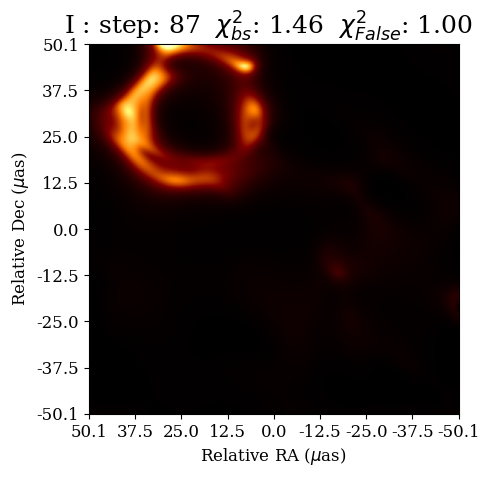

i: 88 chi2_1: 1.46 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.48 s_2: 0.00 s_3: 0.00


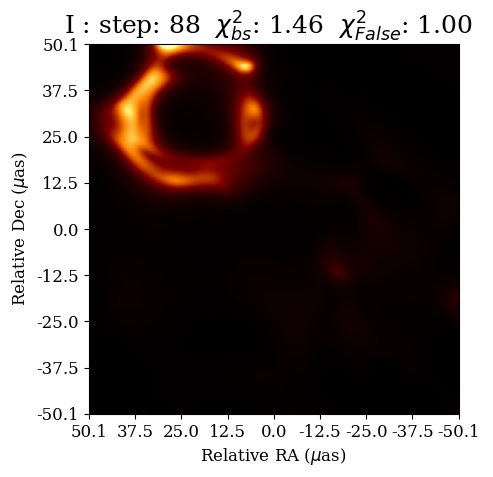

i: 89 chi2_1: 1.43 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.49 s_2: 0.00 s_3: 0.00


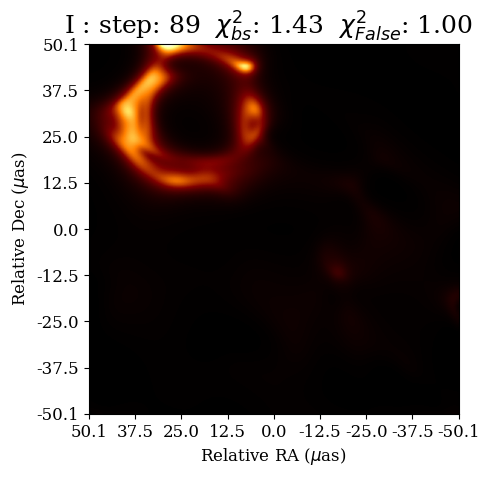

i: 90 chi2_1: 1.42 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.48 s_2: 0.00 s_3: 0.00


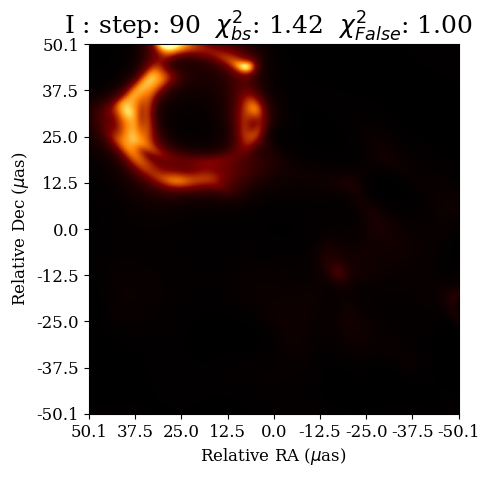

i: 91 chi2_1: 1.41 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.49 s_2: 0.00 s_3: 0.00


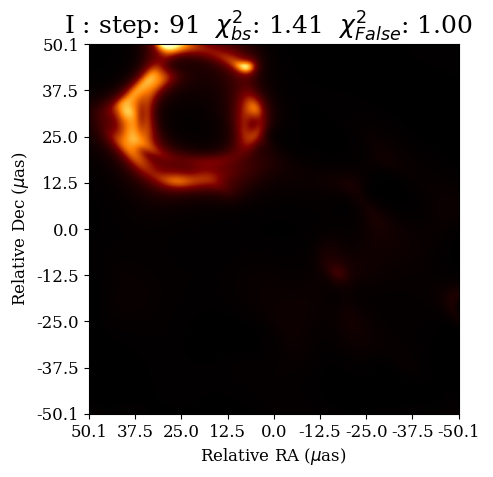

i: 92 chi2_1: 1.40 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.49 s_2: 0.00 s_3: 0.00


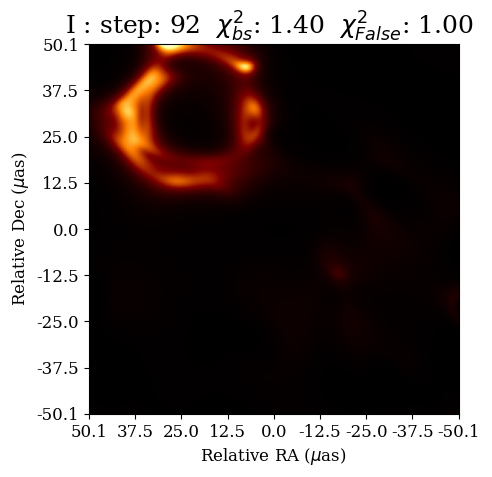

i: 93 chi2_1: 1.39 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.49 s_2: 0.00 s_3: 0.00


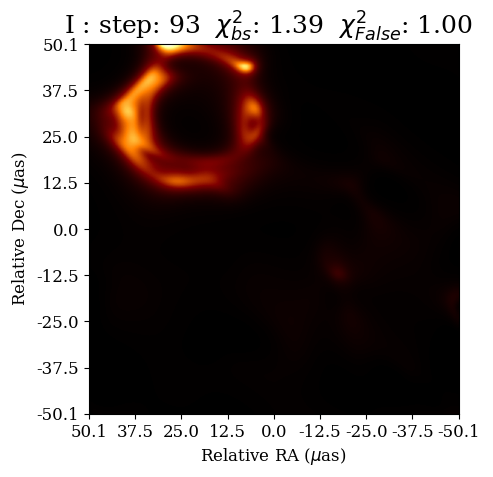

i: 94 chi2_1: 1.38 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.50 s_2: 0.00 s_3: 0.00


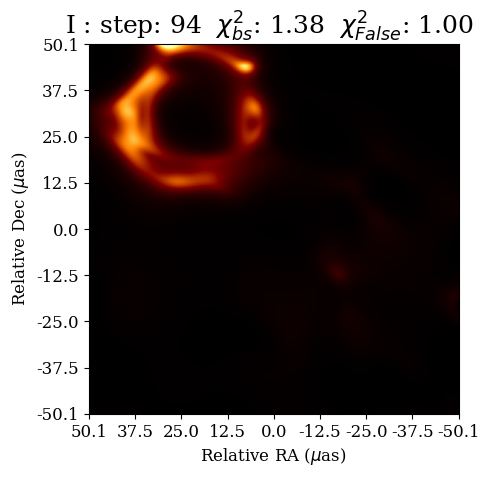

i: 95 chi2_1: 1.37 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.50 s_2: 0.00 s_3: 0.00


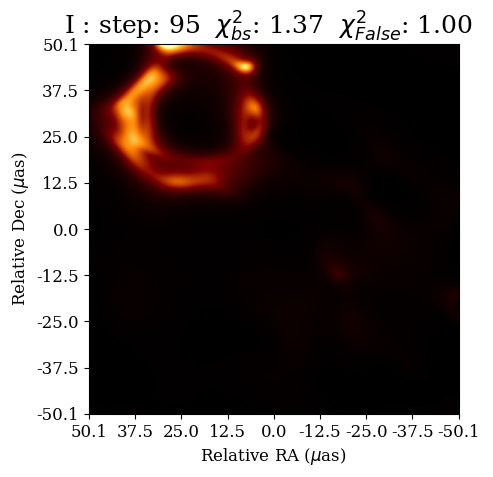

i: 96 chi2_1: 1.36 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.50 s_2: 0.00 s_3: 0.00


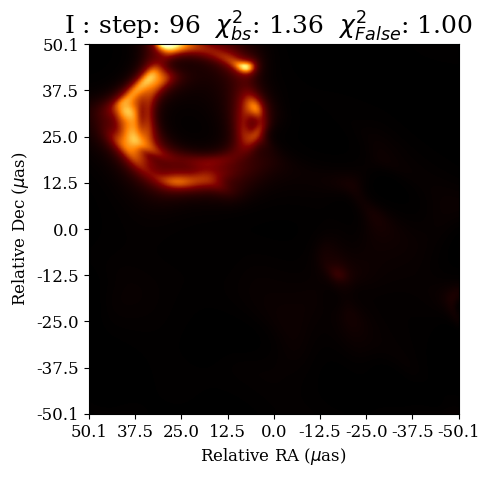

i: 97 chi2_1: 1.35 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.50 s_2: 0.00 s_3: 0.00


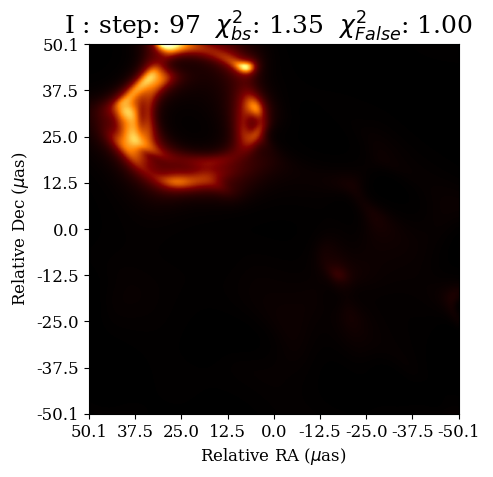

i: 98 chi2_1: 1.34 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.51 s_2: 0.00 s_3: 0.00


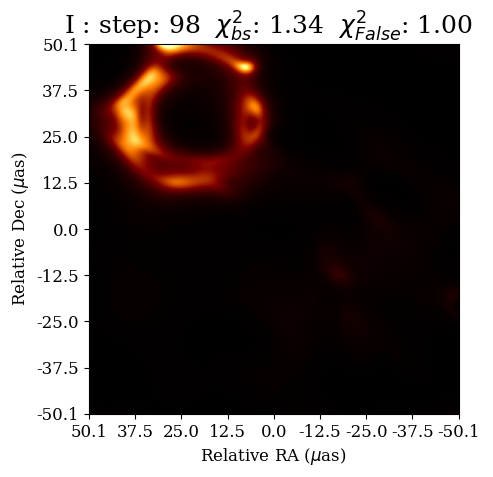

i: 99 chi2_1: 1.32 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.51 s_2: 0.00 s_3: 0.00


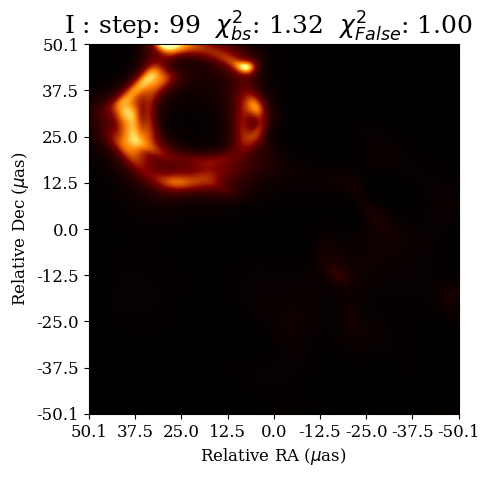

i: 100 chi2_1: 1.30 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.52 s_2: 0.00 s_3: 0.00
time: 80.665874 s
J: 32.782567
Final Chi^2_1: 1.301688 Chi^2_2: 1.000000  Chi^2_3: 1.000000
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT


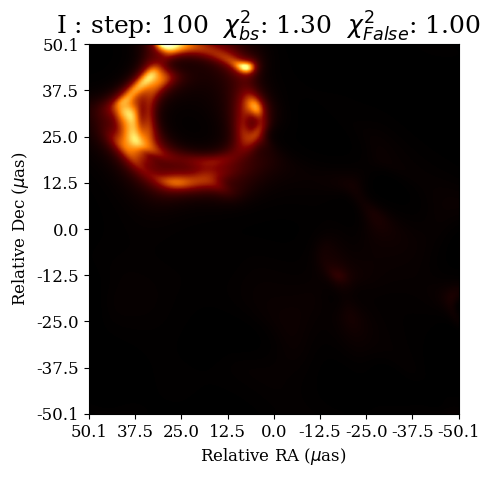

In [15]:
npix = 32
fov = 1.2*im.xdim * im.psize # slightly enlarge the field of view
#dim = obs.dirtyimage(npix, fov)
#dbeam = obs.dirtybeam(npix, fov)
#cbeam = obs.cleanbeam(npix,fov)
#dim.display()
#dbeam.display()
#cbeam.display()

# Resolution
beamparams = obs.fit_beam() # fitted beam parameters (fwhm_maj, fwhm_min, theta) in radians
res = obs.res() # nominal array resolution, 1/longest baseline
print("Clean beam parameters: " , beamparams)
print("Nominal Resolution: " ,res)

# Export the visibility data to uvfits/text
#obs.save_txt('obs.txt') # exports a text file with the visibilities
#obs.save_uvfits('obs.uvp') # exports a UVFITS file modeled on template.UVP

# Generate an image prior
npix = 128
fov = 1*im.fovx()
zbl = im.total_flux() # total flux
prior_fwhm = 200*eh.RADPERUAS # Gaussian size in microarcssec
emptyprior = eh.image.make_square(obs, npix, fov)
flatprior = emptyprior.add_flat(zbl)
gaussprior = emptyprior.add_gauss(zbl, (prior_fwhm, prior_fwhm, 0, 0, 0))

# Image total flux with bispectrum
flux = zbl
tt = time.time()
out  = eh.imager_func(obs, gaussprior, gaussprior, flux,
                      d1='bs', s1='simple',
                      alpha_s1=1, alpha_d1=100,
                      alpha_flux=100, alpha_cm=50,
                      maxit=100, ttype=ttype, show_updates=True)

In [ ]:
# Blur the image with a circular beam and image again to help convergance
out = out.blur_circ(res)
out = eh.imager_func(obs, out, out, flux,
                d1='bs', s1='tv',
                alpha_s1=1, alpha_d1=50,
                alpha_flux=100, alpha_cm=50,
                maxit=100,ttype=ttype, show_updates=False)

out = out.blur_circ(res/2.0)
out = eh.imager_func(obs, out, out, flux,
                d1='bs', s1='tv',
                alpha_s1=1, alpha_d1=10,
                alpha_flux=100, alpha_cm=50,
                maxit=100,ttype=ttype, show_updates=False)

print ("total time: ", time.time() - tt)

Generating I image...
Initial S_1: 0.039632 S_2: 0.000000 S_3: 0.000000
Initial Chi^2_1: 216.111354 Chi^2_2: 1.000000 Chi^2_3: 1.000000
Initial Objective Function: 10756.698097
Total Data 1:  645
Total Pixel #:  16384
Clipped Pixel #:  16384

time: 24.821932 s
J: 9.191231
Final Chi^2_1: 1.163314 Chi^2_2: 1.000000  Chi^2_3: 1.000000
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
Generating I image...
Initial S_1: 0.080055 S_2: 0.000000 S_3: 0.000000
Initial Chi^2_1: 76.496031 Chi^2_2: 1.000000 Chi^2_3: 1.000000
Initial Objective Function: 755.864591
Total Data 1:  645
Total Pixel #:  16384
Clipped Pixel #:  16384



In [ ]:
outblur = out.blur_gauss(beamparams, 0.5)
out.display()